In [151]:
#!dir| findstr i data.csv

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


In [153]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [154]:
df= pd.read_csv('data.csv')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [156]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [157]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [158]:
df.shape

(4600, 18)

In [159]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [160]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [161]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [162]:
columns = ['date', 'street','city','statezip','country','yr_renovated']

##columns=['country']
#columns=['yr_renovated']
df.drop(columns, inplace=True, axis=1)

In [163]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built'],
      dtype='object')

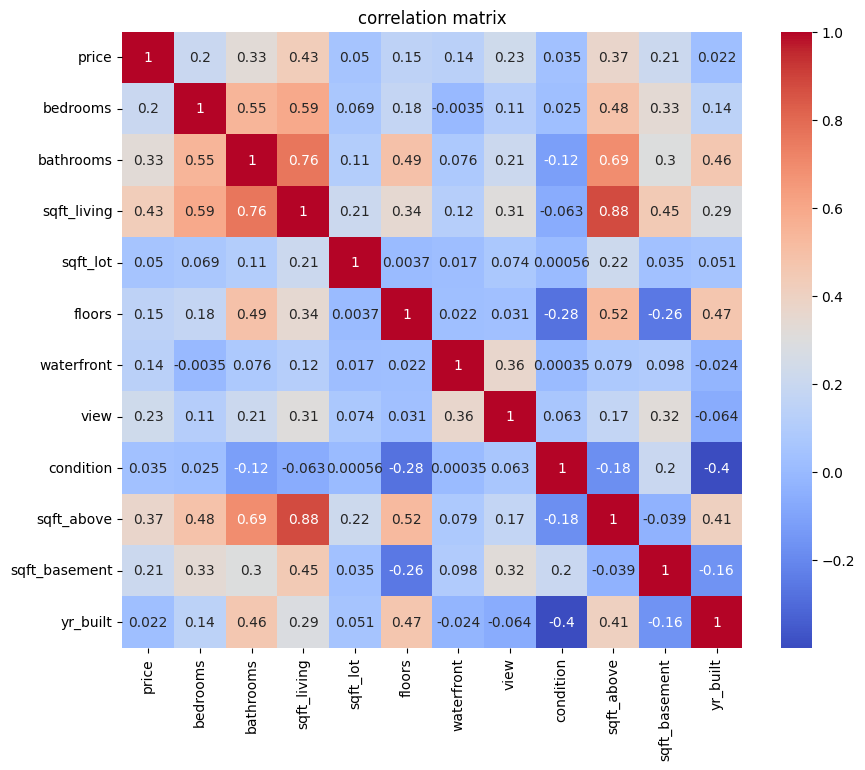

In [164]:
df_corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.title("correlation matrix")
plt.show()

In [165]:
#df = df.drop('date', axis=1)

In [166]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000


In [167]:
#removing outlier (noise in data)
import scipy.stats as stats
z_scores = np.abs(stats.zscore(df))
threshold =3
print("size before removing outliers:",df.shape)
outliers_df = df[(z_scores > threshold).any(axis=1)]
df=df[(z_scores <= threshold).all(axis=1)]
print("size before removing outliers:",df.shape)

size before removing outliers: (4600, 12)
size before removing outliers: (4238, 12)


In [168]:
#data preprocessing
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963


In [169]:
standardscaler = StandardScaler()
standardscaler.fit(df)
df_scaled = pd.DataFrame(standardscaler.transform(df), columns =df.columns)
df_scaled

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,-0.697672,-0.408112,-0.840200,-0.865130,-0.208115,-0.002640,0.0,-0.233429,-0.678606,-0.537343,-0.678976,-0.524566
1,-0.588868,-0.408112,-0.127476,-0.110711,0.111000,-0.934928,0.0,-0.233429,0.814609,0.250259,-0.678976,-0.155640
2,-0.296221,-0.408112,0.228886,-0.021204,-0.198782,-0.934928,0.0,-0.233429,0.814609,-0.991216,1.798550,-0.256256
3,0.191523,0.760523,0.585248,-0.097924,-0.003438,-0.934928,0.0,-0.233429,0.814609,-0.804327,1.303045,0.179746
4,-0.033590,-1.576747,-1.552924,-1.453322,-0.329275,-0.934928,0.0,-0.233429,-0.678606,-1.151406,-0.678976,-1.094722
...,...,...,...,...,...,...,...,...,...,...,...,...
4233,-0.715806,-0.408112,-0.483838,-0.647755,-0.330857,-0.934928,0.0,-0.233429,0.814609,-0.310407,-0.678976,-0.558104
4234,0.132744,-0.408112,0.585248,-0.711689,-0.234925,0.929648,0.0,-0.233429,-0.678606,-0.377153,-0.678976,0.414516
4235,-0.307836,-0.408112,0.585248,1.270260,-0.279134,0.929648,0.0,-0.233429,-0.678606,1.691972,-0.678976,1.286521
4236,-1.108878,0.760523,-0.127476,0.093877,-0.309504,-0.934928,0.0,-0.233429,-0.678606,-0.897771,1.848100,0.112669


In [170]:
y=df_scaled['price']
y

0      -0.697672
1      -0.588868
2      -0.296221
3       0.191523
4      -0.033590
          ...   
4233   -0.715806
4234    0.132744
4235   -0.307836
4236   -1.108878
4237   -1.044346
Name: price, Length: 4238, dtype: float64

In [171]:
y.shape

(4238,)

In [172]:
x=df.drop('price', axis=1)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976
5,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974


In [173]:
x.shape

(4238, 11)

In [174]:
df_scaled.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.610436
sqft_above       0.528053
bathrooms        0.450738
bedrooms         0.295792
floors           0.279115
sqft_basement    0.202730
view             0.182330
sqft_lot         0.081160
condition        0.049008
yr_built         0.021784
waterfront            NaN
Name: price, dtype: float64

In [175]:
#corrcoef = np.corrcoef(x.T, y)
#corrmatrix = pd.DataFrame(corrcoef)
#corrmatrix
#cm = corrmatrix[0].sort_values(ascending=False)
#cm.head(11)

In [176]:
len(x.columns)

11

In [177]:
x.columns[2]

'sqft_living'

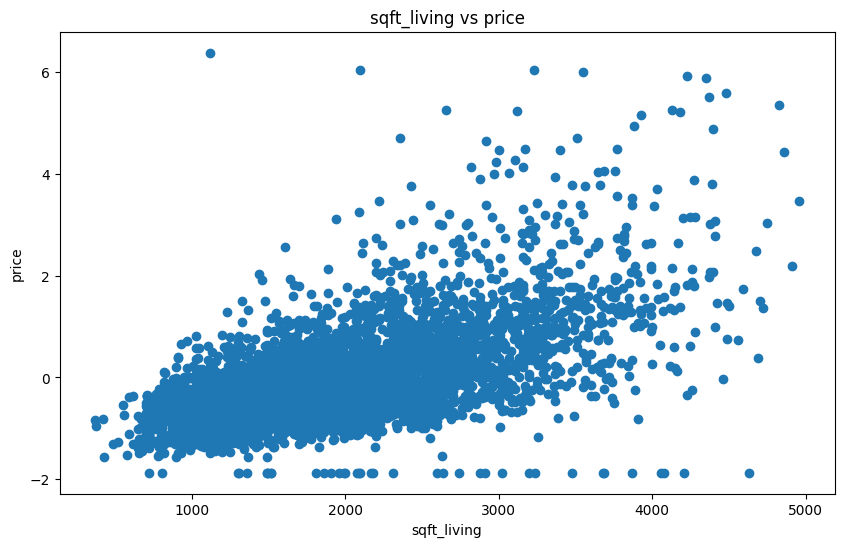

In [178]:
plt.figure(figsize=(10, 6))
plt.scatter(x['sqft_living'], y)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('sqft_living vs price')
plt.show()

In [179]:
# Split our data between a training set and a test set:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [180]:
len(x_train)+len(x_test)==len(df)

True

In [181]:
x_train.shape,x_test.shape

((3178, 11), (1060, 11))

In [182]:

models=[('Random Forest',RandomForestRegressor()),
         ('Linear Regression',LinearRegression()),
          ('Decision Tree',DecisionTreeRegressor()),
          ('KNN',KNeighborsRegressor())
]



In [183]:
models

[('Random Forest', RandomForestRegressor()),
 ('Linear Regression', LinearRegression()),
 ('Decision Tree', DecisionTreeRegressor()),
 ('KNN', KNeighborsRegressor())]

In [184]:
for name,model in models:
    print(name)
    print("\n")
    model.fit(x_train, y_train)
# Make predictions on the test data
    y_pred = model.predict(x_test)
    print("mean_squared_error",mean_squared_error(y_test,y_pred))    
    print("mean_absolute_error",mean_absolute_error(y_test,y_pred))   
    print("r2_score",r2_score(y_test,y_pred))
    print("\n")

Random Forest


mean_squared_error 0.4927527324972577
mean_absolute_error 0.49202359149652014
r2_score 0.4323168004613873


Linear Regression


mean_squared_error 0.48485364834709294
mean_absolute_error 0.4907763435667888
r2_score 0.4414170592079285


Decision Tree


mean_squared_error 0.9598795049600375
mean_absolute_error 0.677817539237545
r2_score -0.10584362624571808


KNN


mean_squared_error 0.6315559225926201
mean_absolute_error 0.5618319255553631
r2_score 0.2724064968489358




In [185]:
model=LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [186]:
x_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
3449,5.0,3.0,3690,49709,1.0,0,2,3,2690,1000,1960
818,4.0,2.5,2280,7568,2.0,0,0,4,2280,0,2001
3536,4.0,2.5,2110,35091,1.0,0,0,4,1290,820,1985
2131,3.0,2.5,2140,8925,2.0,0,0,3,2140,0,1991
2368,4.0,2.5,3010,6100,2.0,0,0,3,3010,0,2005
...,...,...,...,...,...,...,...,...,...,...,...
2471,4.0,2.5,3670,54450,2.0,0,0,3,3670,0,1999
1983,3.0,2.5,2370,12753,2.0,0,0,3,2370,0,2001
4044,3.0,2.5,3030,9053,2.0,0,0,3,3030,0,2009
1531,2.0,1.0,910,7000,1.0,0,0,3,910,0,1952


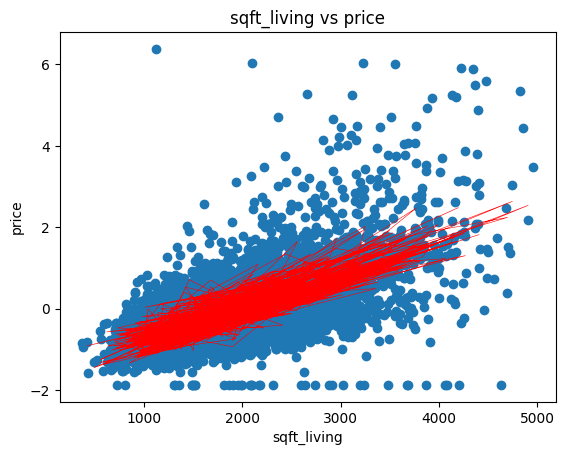

In [187]:
#plt.figure(figsize=(10, 6))
plt.scatter(x['sqft_living'], y)
plt.plot(x_test['sqft_living'], y_pred, color='red', linewidth=0.4, label='Linear Regression')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('sqft_living vs price')
plt.show()

In [188]:
model2_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(model2_results.head())

        Actual  Predicted
3188  0.285320   1.347104
764  -0.247447   0.095226
3264 -0.146146  -0.333174
1967  0.529192   0.148928
2185  1.090098   0.617937


In [189]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_rmse

0.6963143315680734

In [190]:
mse=mean_squared_error(y_test, y_pred)
mse

0.48485364834709294

In [191]:
root=np.sqrt(mse)
root

0.6963143315680734

#R-squared (R²): R-squared is a measure of how well the independent variable(s) explain the variability of the dependent variable. It ranges from 0 to 1, where 1 indicates a perfect fit. Higher R-squared values are generally preferred.

#Mean Squared Error (MSE): MSE measures the average squared difference between the actual and predicted values. It gives more weight to larger errors. Lower MSE values indicate better model performance.

#Root Mean Squared Error (RMSE): RMSE is the square root of the MSE and is in the same unit as the dependent variable. Like MSE, lower RMSE values are preferred.

https://www.kaggle.com/code/minaemil329/house-price-analysis-visualization-and-prediction